In [17]:
#爬取数据生成contents.csv文件
import requests
url = "https://www.bitpush.news/covid19/"
# 设置请求头信息
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36"
}
# 使用reqeusts模快发起 GET 请求
response = requests.get(url, headers=headers)
# 获取请求的返回结果
html = response.text
# 导入 lxml
from lxml import etree
parse = etree.HTMLParser(encoding='utf-8')        # 添加编码
# 解析 requests 返回的响应结果
doc = etree.HTML(html)  
# 提取美国各州数据
base_path = '//h1[contains(text(), "美国境内统计数据")]/following-sibling::div[@class="table_container"]//tbody/tr'
# base_path = '//div[@class="table_container"][2]//tbody/tr'
# # 提取数据&数据清洗
county = doc.xpath(f'{base_path}/td[1]/span/text()')
person = doc.xpath(f'{base_path}/td[2]/text()')
death = doc.xpath(f'{base_path}/td[3]/text()')
person = [x.replace(",", "") for x in person]
death = [x.replace(",", "") for x in death]
message = list(zip(county, person, death))
import csv
with open("contents.csv", "w", encoding="utf-8", newline="") as f:  # 确保换行符正确
    w = csv.writer(f)
    w.writerows(message)
print(message)

[('加州', '5959487', '76983'), ('德克萨斯', '4946880', '76364'), ('佛罗里达', '4486276', '62622'), ('纽约', '3929750', '60276'), ('伊利诺伊', '2382423', '30794'), ('宾夕法尼亚', '2206899', '37522'), ('俄亥俄', '2151829', '30072'), ('乔治亚', '1928942', '31521'), ('密西根', '1855658', '29955'), ('北卡', '1816380', '19619'), ('新泽西', '1782463', '29374'), ('田纳西', '1462996', '20941'), ('亚利桑那', '1430241', '24586'), ('印第安纳', '1314688', '19448'), ('马萨诸塞', '1250765', '20510'), ('弗吉尼亚', '1220869', '15651'), ('威斯康星', '1186066', '11402'), ('密苏里', '1075994', '16476'), ('明尼苏达', '1064065', '10906'), ('南卡', '1048252', '14746'), ('科罗拉多', '979437', '10402'), ('阿拉巴马', '957848', '16585'), ('华盛顿州', '913980', '9974'), ('路易斯安那', '908428', '15054'), ('肯塔基', '904916', '12319'), ('马里兰', '800743', '12107'), ('俄克拉荷马', '737593', '12592'), ('犹他', '682036', '3887'), ('阿肯色', '604843', '9298'), ('爱荷华', '596296', '8019'), ('密西西比', '586547', '10527'), ('堪萨斯', '565288', '7101'), ('康涅狄格', '563635', '9281'), ('内华达', '509472', '8509'), ('俄勒冈', '449267', '

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   county  58 non-null     object
 1   person  58 non-null     int64 
 2   death   58 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


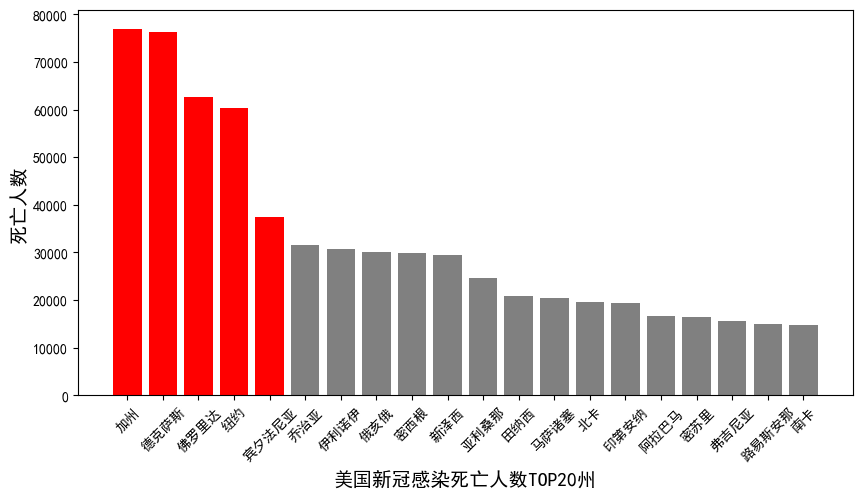

In [19]:
#请等待contents.csv文件生成以后再运行，爬虫操作有点慢。。
#数据可视化
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("contents.csv", names=["county", "person", "death"])
df_sorted = df.sort_values("death", ascending=False)
df_top20 = df_sorted.head(20)
df.head()
df.info()
# 在jupyter中直接展示图像
%matplotlib inline
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['figure.figsize'] = (10, 5)  # 设置figure_size尺寸

# x轴坐标
x = df_top20["county"].values
# y轴坐标
y = df_top20["death"].values
# 绘制柱状图
mean_death = df_top20["death"].mean()
colors = ['red' if val > mean_death else 'gray' for val in y]
plt.bar(x, y, color=colors)
# 设置x轴名称
plt.xlabel("美国新冠感染死亡人数TOP20州",fontsize=14)
# 设置x轴名称
plt.ylabel("死亡人数",fontsize=14)
plt.xticks(rotation=45)
plt.show()